In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rasterio as rio
import skgstat as skg

In [2]:
cwd = "c:\\Users\\m1865\\Desktop\\DISC"
cwd_Images_Raw = cwd + "\\Sentinel-2 Images Raw (Replication)"
cwd_Images_Processed = cwd + "\\Sentinel-2 Images Processed (Replication)"

In [3]:
# Read Albedo raster image
img_1000 = rio.open(cwd_Images_Processed + "\\Havard\\Albedo 1000m.tif")
band_1000 = img_1000.read(1)
band_1000.shape

(101, 101)

In [4]:
# Read Albedo raster image
img_1500 = rio.open(cwd_Images_Processed + "\\Havard\\Albedo 1500m.tif")
band_1500 = img_1500.read(1)
band_1500.shape

(151, 151)

In [5]:
# Read Albedo raster image
img_2000 = rio.open(cwd_Images_Processed + "\\Havard\\Albedo 2000m RE.tif")
band_2000 = img_2000.read(1)
band_2000.shape

(100, 100)

In [6]:
# reshape the band arrays into one-dimensional array
band_1000_reshape = band_1000.reshape(-1)
band_1500_reshape = band_1500.reshape(-1)
band_2000_reshape = band_2000.reshape(-1)

In [7]:
# Get the coordinates n-dimensional array
list_Coordinates_1000 = []
for x in range(img_1000.shape[0]):
    for y in range(img_1000.shape[1]):
        temp_x, temp_y = img_1000.xy(x, y)
        temp_list = [temp_x, temp_y]
        list_Coordinates_1000.append(temp_list)
arr_Coordinates_1000 = np.array(list_Coordinates_1000)
arr_Coordinates_1000

array([[ 731815., 4713895.],
       [ 731825., 4713895.],
       [ 731835., 4713895.],
       ...,
       [ 732795., 4712895.],
       [ 732805., 4712895.],
       [ 732815., 4712895.]])

In [8]:
list_Coordinates_1500 = []
for x in range(img_1500.shape[0]):
    for y in range(img_1500.shape[1]):
        temp_x, temp_y = img_1500.xy(x, y)
        temp_list = [temp_x, temp_y]
        list_Coordinates_1500.append(temp_list)
arr_Coordinates_1500 = np.array(list_Coordinates_1500)
arr_Coordinates_1500

array([[ 731565., 4714145.],
       [ 731575., 4714145.],
       [ 731585., 4714145.],
       ...,
       [ 733045., 4712645.],
       [ 733055., 4712645.],
       [ 733065., 4712645.]])

In [9]:
list_Coordinates_2000 = []
for x in range(img_2000.shape[0]):
    for y in range(img_2000.shape[1]):
        temp_x, temp_y = img_2000.xy(x, y)
        temp_list = [temp_x, temp_y]
        list_Coordinates_2000.append(temp_list)
arr_Coordinates_2000 = np.array(list_Coordinates_2000)
arr_Coordinates_2000

array([[ 731320.05, 4714389.95],
       [ 731340.15, 4714389.95],
       [ 731360.25, 4714389.95],
       ...,
       [ 733269.75, 4712400.05],
       [ 733289.85, 4712400.05],
       [ 733309.95, 4712400.05]])

In [10]:
# Get the maximum lag
diagonal_1000 = 1000 * (2 ** 0.5) / 2
bin_1000 = np.arange(10,diagonal_1000,30)
bin_1000[-1]

700.0

In [11]:
# Get the maximum lag
diagonal_1500 = 1500 * (2 ** 0.5) / 2
bin_1500 = np.arange(10,diagonal_1500,30)
bin_1500[-1]

1060.0

In [12]:
# Get the maximum lag
diagonal_2000 = 2000 * (2 ** 0.5) / 2
bin_2000 = np.arange(10,diagonal_2000,10)
bin_2000[-1]

1410.0

In [13]:
V_1000 = skg.Variogram(arr_Coordinates_1000, band_1000_reshape, use_nugget=True, bin_func=bin_1000, maxlag = bin_1000[-1])
V_1000.describe()

{'model': 'spherical',
 'estimator': 'matheron',
 'dist_func': 'euclidean',
 'normalized_effective_range': 191494.9923830338,
 'normalized_sill': 3.835864820519436e-07,
 'normalized_nugget': 1.4090597903898398e-07,
 'effective_range': 273.5642748329054,
 'sill': 0.0005213991345471883,
 'nugget': 0.0001915298347596664,
 'params': {'estimator': 'matheron',
  'model': 'spherical',
  'dist_func': 'euclidean',
  'bin_func': 'custom_bin_edges',
  'normalize': False,
  'fit_method': 'trf',
  'fit_sigma': None,
  'use_nugget': True,
  'maxlag': 700.0,
  'n_lags': 10,
  'verbose': False},
 'kwargs': {}}

In [14]:
V_1500 = skg.Variogram(arr_Coordinates_1500, band_1500_reshape, use_nugget=True, bin_func=bin_1500, maxlag = bin_1500[-1])
V_1500.describe()

{'model': 'spherical',
 'estimator': 'matheron',
 'dist_func': 'euclidean',
 'normalized_effective_range': 337921.60620154644,
 'normalized_sill': 2.965293638960756e-07,
 'normalized_nugget': 1.751786565964747e-07,
 'effective_range': 318.7939681146664,
 'sill': 0.00042008658347058637,
 'nugget': 0.0002481717236353404,
 'params': {'estimator': 'matheron',
  'model': 'spherical',
  'dist_func': 'euclidean',
  'bin_func': 'custom_bin_edges',
  'normalize': False,
  'fit_method': 'trf',
  'fit_sigma': None,
  'use_nugget': True,
  'maxlag': 1060.0,
  'n_lags': 10,
  'verbose': False},
 'kwargs': {}}

In [15]:
V_2000 = skg.Variogram(arr_Coordinates_2000, band_2000_reshape, use_nugget=True, bin_func=bin_2000, maxlag = bin_2000[-1])
V_2000.describe()

{'model': 'spherical',
 'estimator': 'matheron',
 'dist_func': 'euclidean',
 'normalized_effective_range': 507191.89592827344,
 'normalized_sill': 3.413879429371019e-07,
 'normalized_nugget': 2.660305199289414e-07,
 'effective_range': 359.7105644881372,
 'sill': 0.0004303812476911964,
 'nugget': 0.0003353795863612273,
 'params': {'estimator': 'matheron',
  'model': 'spherical',
  'dist_func': 'euclidean',
  'bin_func': 'custom_bin_edges',
  'normalize': False,
  'fit_method': 'trf',
  'fit_sigma': None,
  'use_nugget': True,
  'maxlag': 1410.0,
  'n_lags': 10,
  'verbose': False},
 'kwargs': {}}

In [37]:
range_1000 = V_1000.parameters[0]
sill_1000 = V_1000.parameters[1] + V_1000.parameters[2]
nugget_1000 = V_1000.parameters[2]
range_2000 = V_2000.parameters[0]
sill_2000 = V_2000.parameters[1] + V_1000.parameters[2]
nugget_2000 = V_2000.parameters[2]
range_1500 = V_1500.parameters[0]
sill_1500 = V_1500.parameters[1] + V_1500.parameters[2]
nugget_1500 = V_1500.parameters[2]
range_1000

273.5642748329054

In [16]:
CV_1000 = np.std(band_1000) / np.mean(band_1000)
CV_1500 = np.std(band_1500) / np.mean(band_1500)
Rcv_1000 = (CV_1000 - CV_1500) / CV_1000
Rcv_1000

0.02680482827223053

In [17]:
RAW_1000 = (abs(2 * Rcv_1000)) ** (-1)
RAW_1000

18.65335584029814

In [33]:
import math
H = 30
g = 2 * H * math.tan(81 * math.pi / 180)
Rse_1000 = math.exp(-((g / range_1000) ** 2 + (g / range_1500) ** 2) ** (1/2))
Rse_1000

0.16125954851052093

In [20]:
# Get the index of the range in the bin
for i in range(len(V_1000.bins)):
    if range_1000 >= V_1000.bins[i] and range_1000 <= V_1000.bins[i+1]:
        index_1000 = i + 1
estimator_Range_1000 = V_1000.experimental[index_1000]
print(f"The range {(range_1000)} falls in {V_1000.bins[index_1000 - 1]} and {V_1000.bins[index_1000]}, whose value is {estimator_Range_1000}")
for i in range(len(V_1500.bins)):
    if range_1500 >= V_1500.bins[i] and range_1500 <= V_1500.bins[i+1]:
        index_1500 = i + 1
estimator_Range_1500 = V_1500.experimental[index_1500]
print(f"The range {(range_1500)} falls in {V_1500.bins[index_1500 - 1]} and {V_1500.bins[index_1500]}, whose value is {estimator_Range_1500}")

The range 273.5642748329054 falls in 250.0 and 280.0, whose value is 0.0007027696132886433
The range 318.7939681146664 falls in 310.0 and 340.0, whose value is 0.0006740615305698683


In [21]:
ST_1000 = (estimator_Range_1000 - nugget_1000) / estimator_Range_1000
ST_1500 = (estimator_Range_1500 - nugget_1500) / estimator_Range_1500
Rst_1000 = (ST_1500 - ST_1000) / ST_1000
Rst_1000

-0.13146756680168833

In [25]:
from scipy.integrate import quad
def f_1000_SV(x):
    return (V_1000.fitted_model(x) - nugget_1000) / sill_1000
def f_1500_SV(x):
    return (V_1500.fitted_model(x) - nugget_1500) / sill_1500
SV_1000 = quad(f_1000_SV, 0, range_1000)[0]
SV_1500 = quad(f_1500_SV, 0, range_1500)[0]
Rsv_1000 = (SV_1500 - SV_1000) / SV_1000
Rsv_1000

0.001661809240126875

In [34]:
ST_Score_1000 = (abs(Rcv_1000) / 3 + abs(Rst_1000) / 3 + abs(Rsv_1000) / 3 +Rse_1000) ** (-1)
ST_Score_1000

4.660463125319831

In [41]:
from scipy.interpolate import interp1d
# Get the theoretical functions
def f_1000(x):
   return V_1000.fitted_model(x)
def f_1500(x):
   return V_1500.fitted_model(x)
def f_2000(x):
   return V_2000.fitted_model(x)
# Create cubic interpolation model in order to make curved plot (otherwise it will be ugly af)
cubic_model_1000 = interp1d(np.concatenate((np.array([0]),bin_1000)), f_1000(np.concatenate((np.array([0]),bin_1000)),), kind = "cubic")
cubic_model_1500 = interp1d(np.concatenate((np.array([0]),bin_1500)), f_1500(np.concatenate((np.array([0]),bin_1500)),), kind = "cubic")
cubic_model_2000 = interp1d(np.concatenate((np.array([0]),bin_2000)), f_2000(np.concatenate((np.array([0]),bin_2000)),), kind = "cubic")
x_1000 = np.linspace(0,bin_1000[-1])
x_1500 = np.linspace(0,bin_1500[-1])
x_2000 = np.linspace(0,bin_2000[-1])

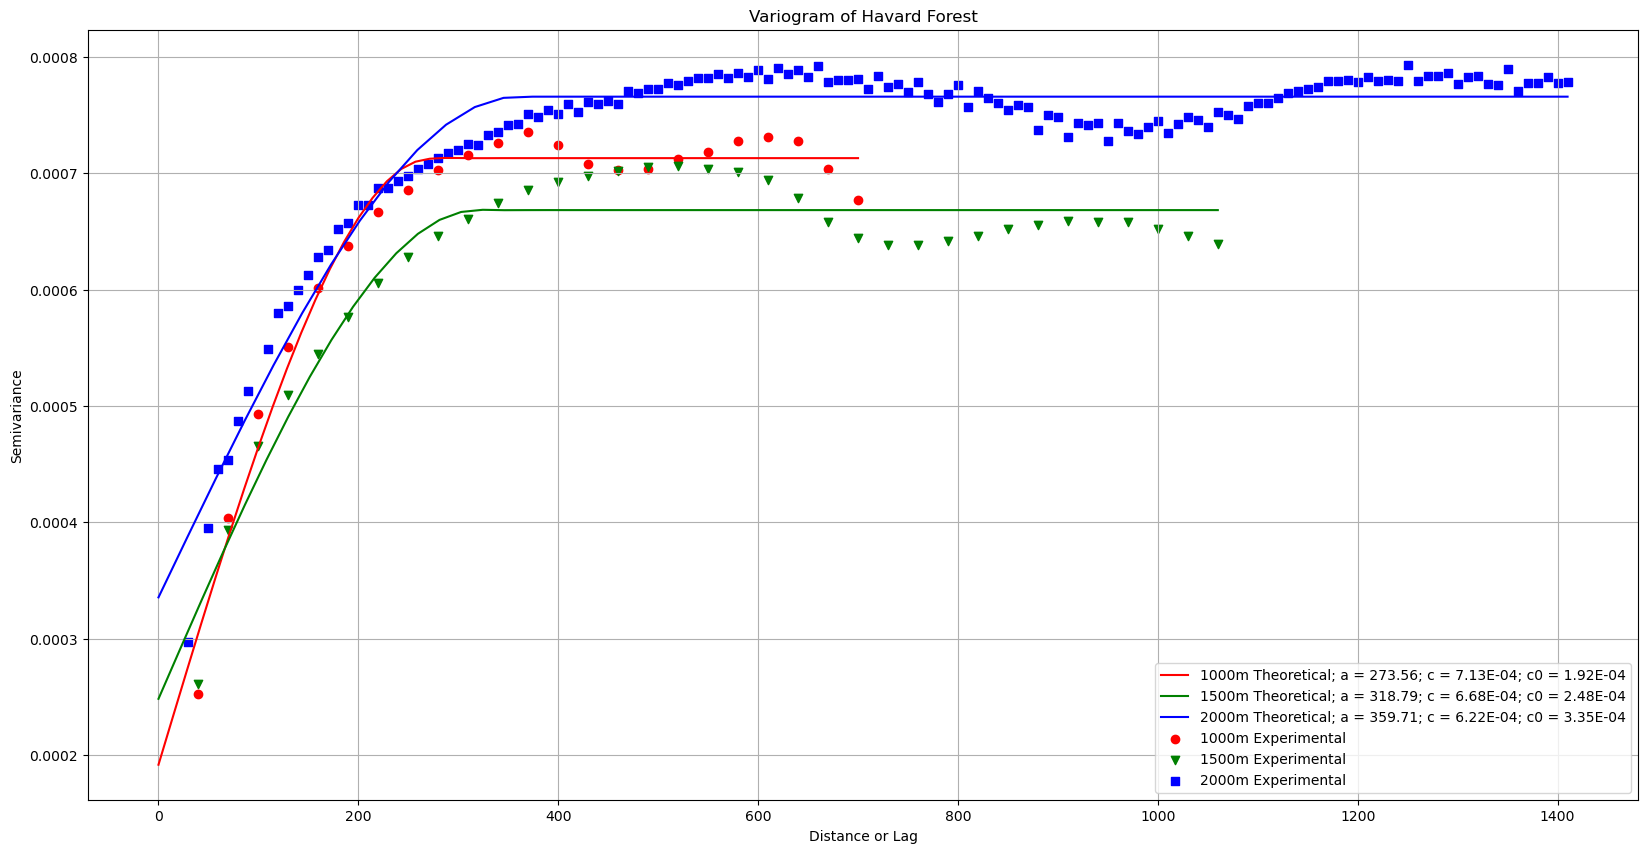

In [43]:
# Plot! 
plt.figure(figsize = (20,10))
plt.plot(x_1000, cubic_model_1000(x_1000), label = f'1000m Theoretical; a = {range_1000:.2F}; c = {sill_1000:.2E}; c0 = {nugget_1000:.2E}', color = 'Red', linestyle = '-')
plt.plot(x_1500, cubic_model_1500(x_1500), label = f'1500m Theoretical; a = {range_1500:.2F}; c = {sill_1500:.2E}; c0 = {nugget_1500:.2E}', color = 'Green', linestyle = '-')
plt.plot(x_2000, cubic_model_2000(x_2000), label = f'2000m Theoretical; a = {range_2000:.2F}; c = {sill_2000:.2E}; c0 = {nugget_2000:.2E}', color = 'Blue', linestyle = '-')
plt.scatter(V_1000.get_empirical()[0],V_1000.get_empirical()[1], color = 'Red', label = '1000m Experimental', marker = 'o')
plt.scatter(V_1500.get_empirical()[0],V_1500.get_empirical()[1], color = 'Green', label = '1500m Experimental', marker = 'v')
plt.scatter(V_2000.get_empirical()[0],V_2000.get_empirical()[1], color = 'Blue', label = '2000m Experimental', marker = 's')
plt.title("Variogram of Havard Forest")
plt.xlabel("Distance or Lag")
plt.ylabel("Semivariance")
plt.legend()
plt.grid()
# plt.savefig(cwd_Images_Processed + "\\" + site_Name + "\\Result.png")